## O código está todo comentado porém vou dar um resumo das alterações realizadas.

### Foi mantida a lógica de criação das tabelas e os parâmetros padrões utilizados, porém foi feito uma verificação para registros anteriores e mudado a dinamica do nome das pastas. Então é feito a leitura das pastas de input e output, caso na pasta de output esteja faltando arquivos, então será preenchido com os arquivos do input. Dessa maneira ficou fácil de aplicar caso tenha que ler arquivos de diferentes anos e caso precise fazer um trabalho retroativo.

C:\Users\Bill_\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


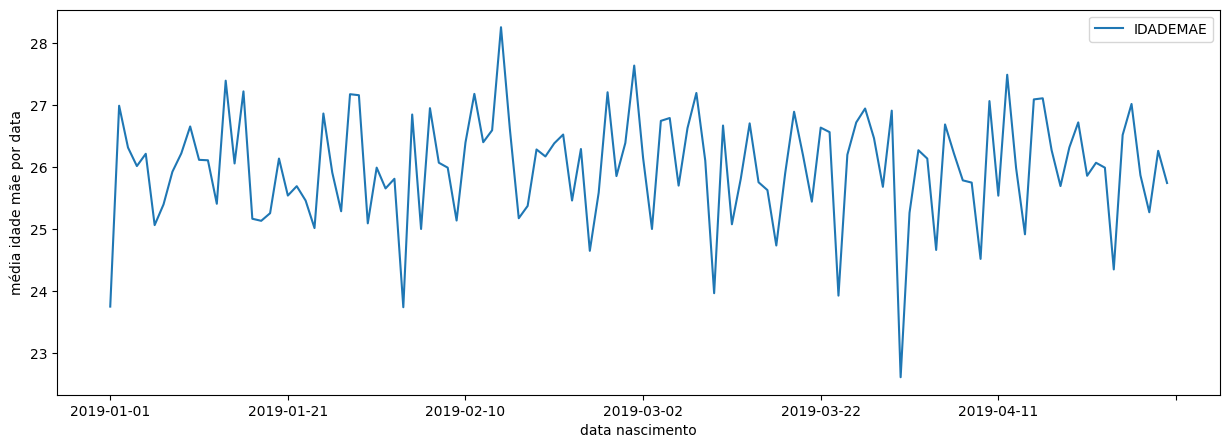

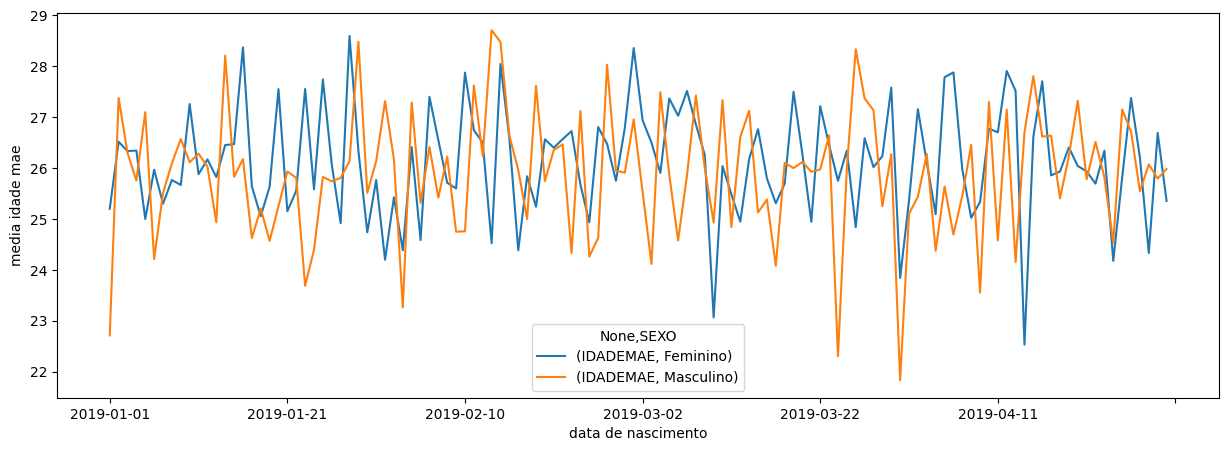

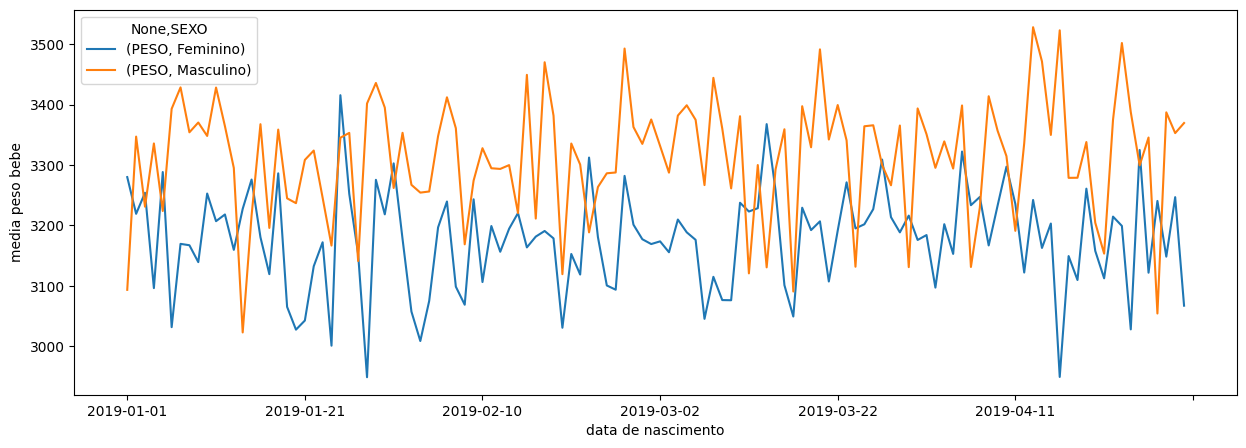

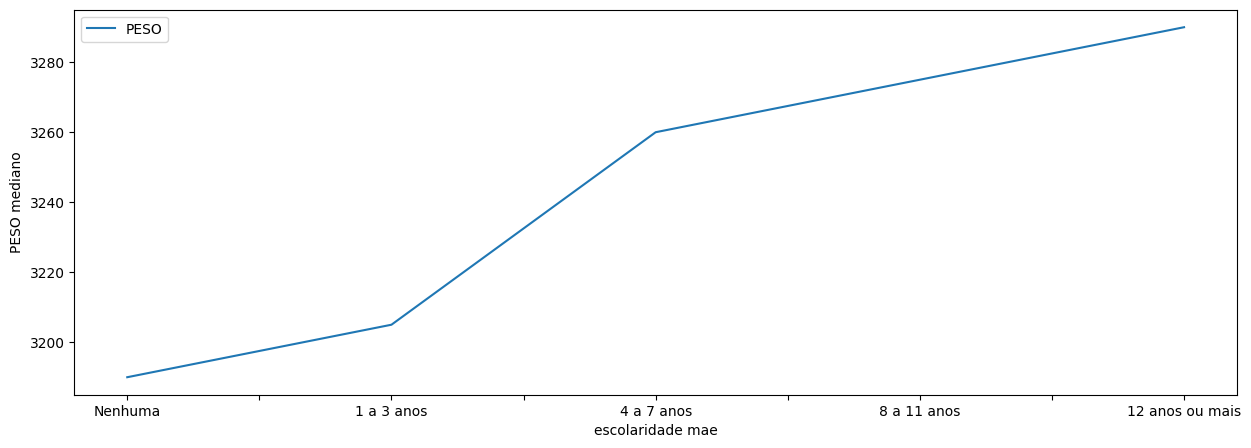

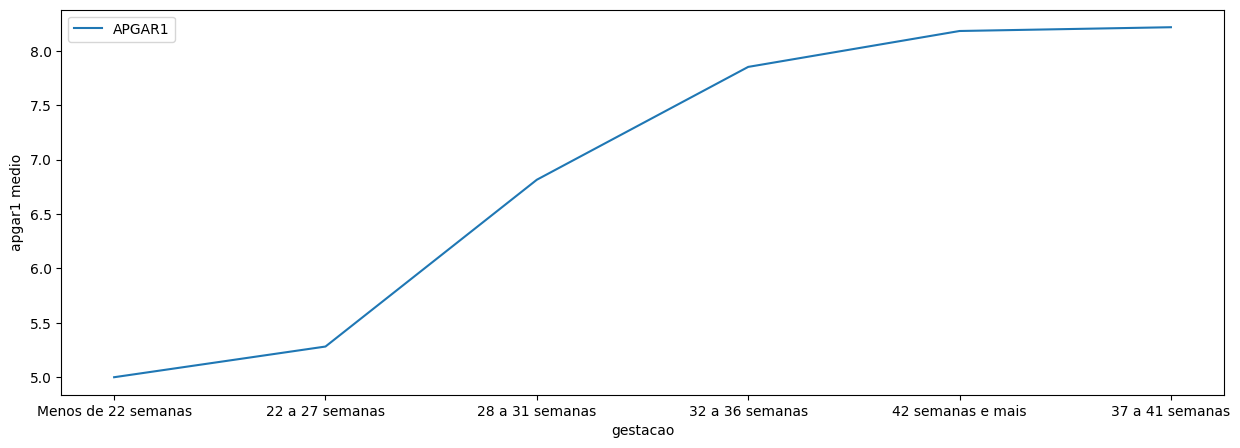

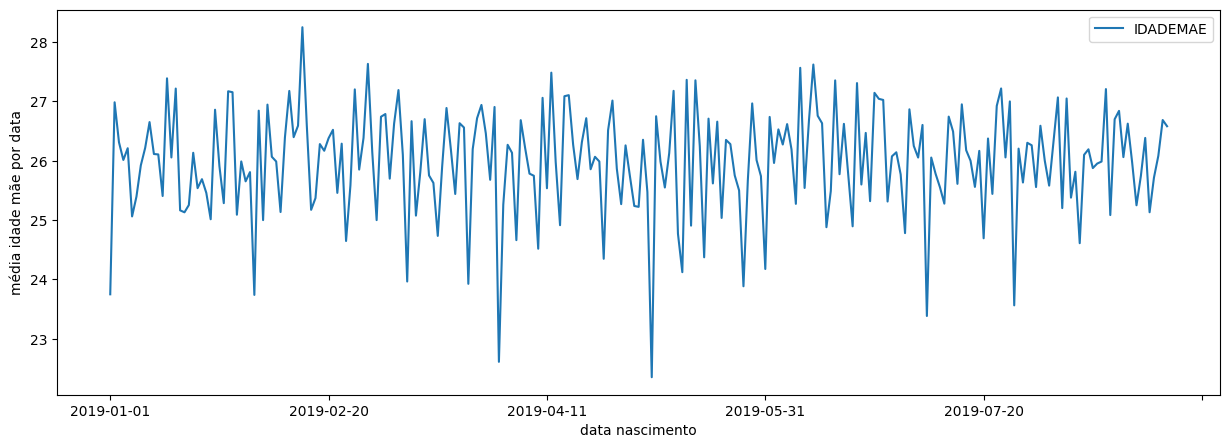

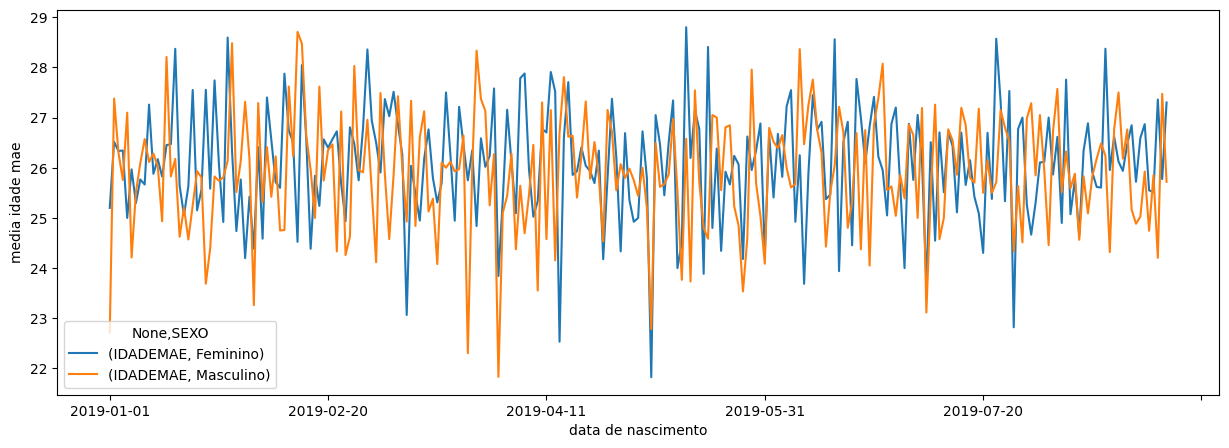

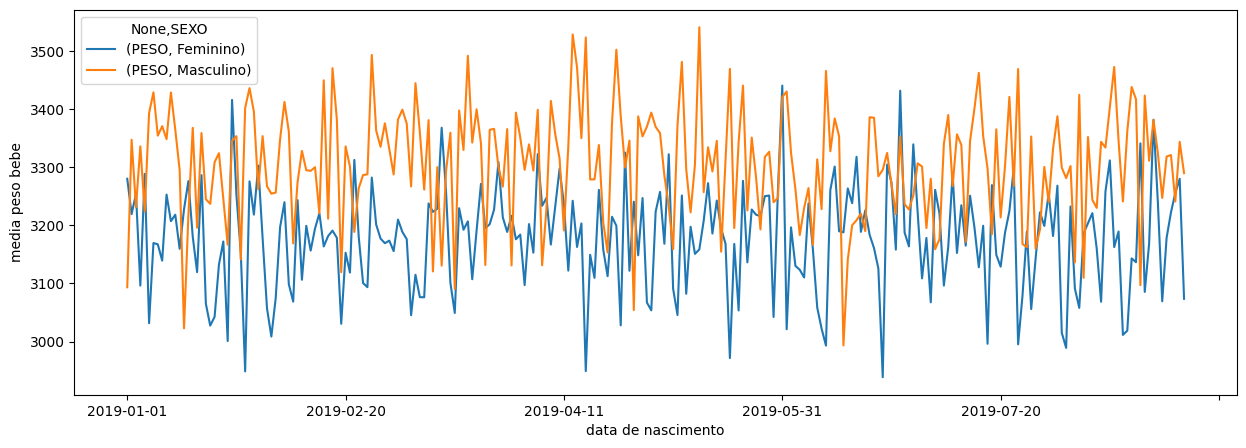

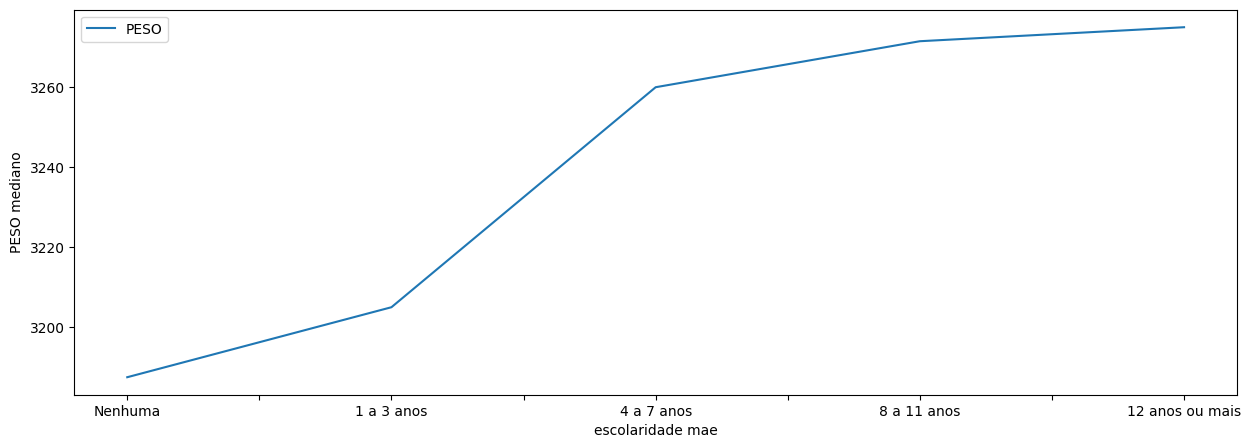

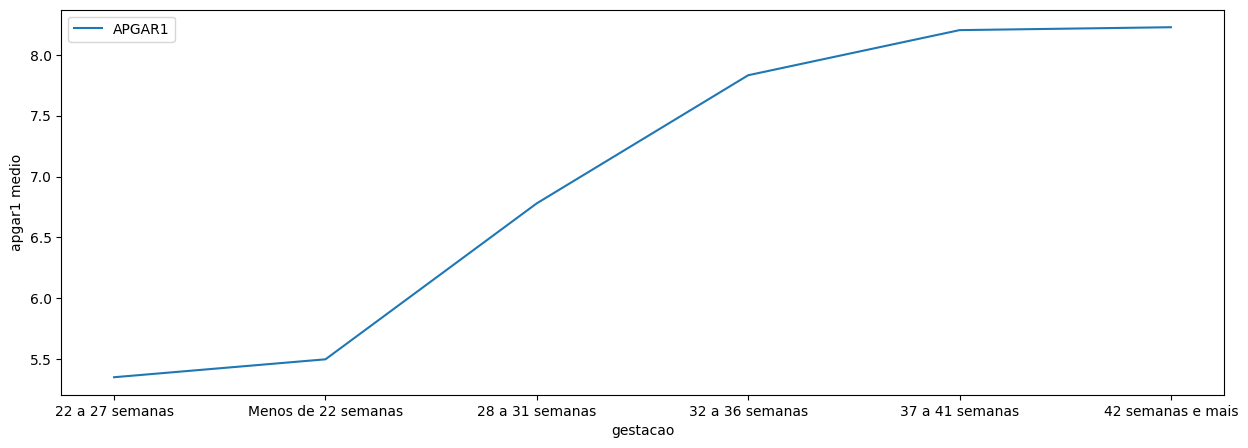

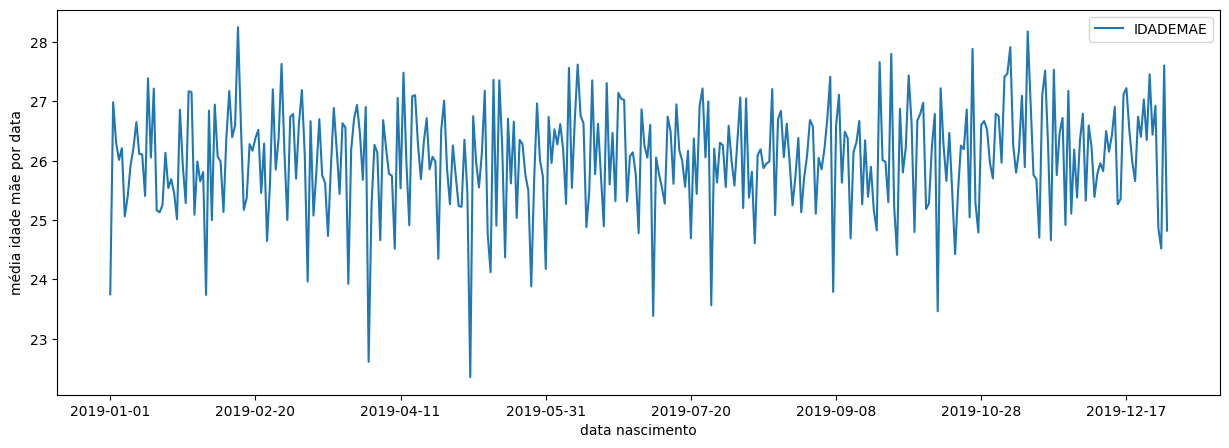

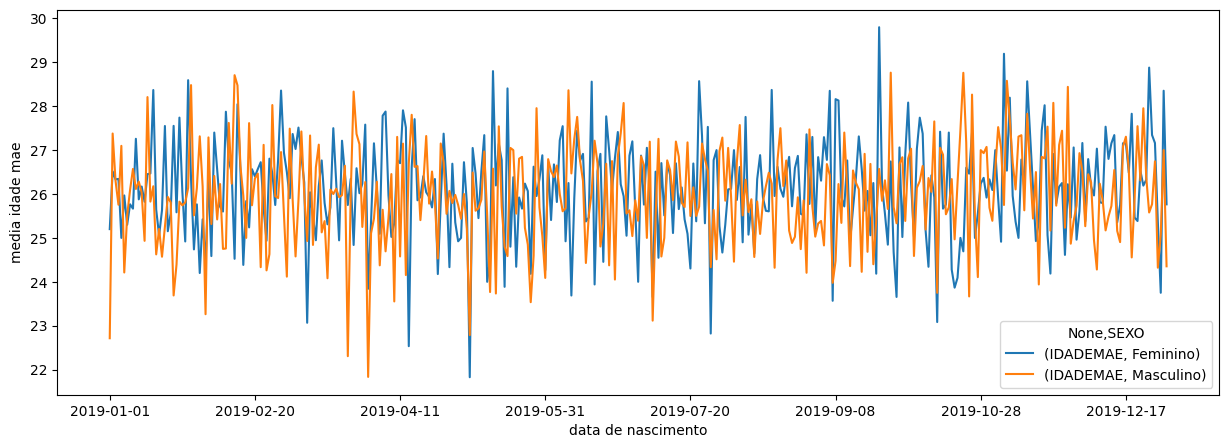

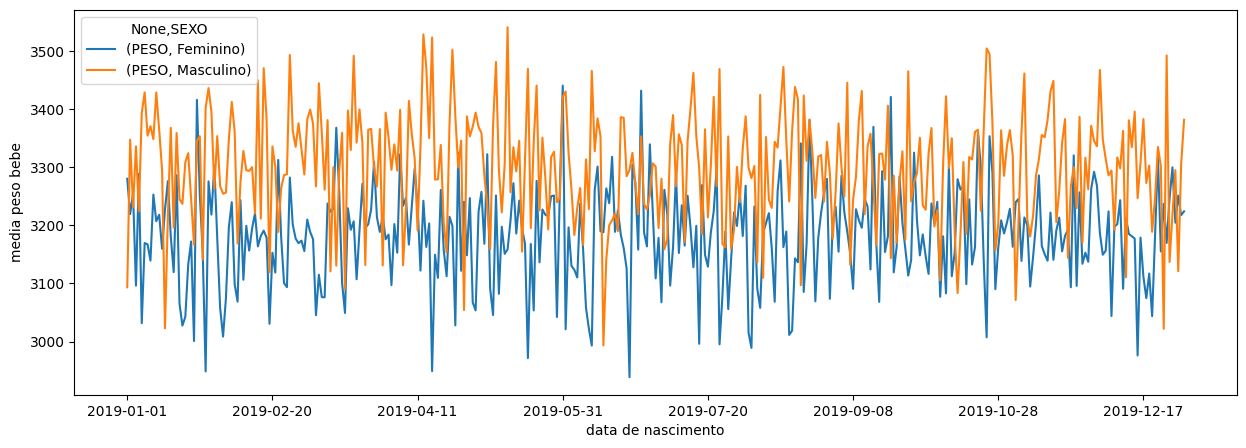

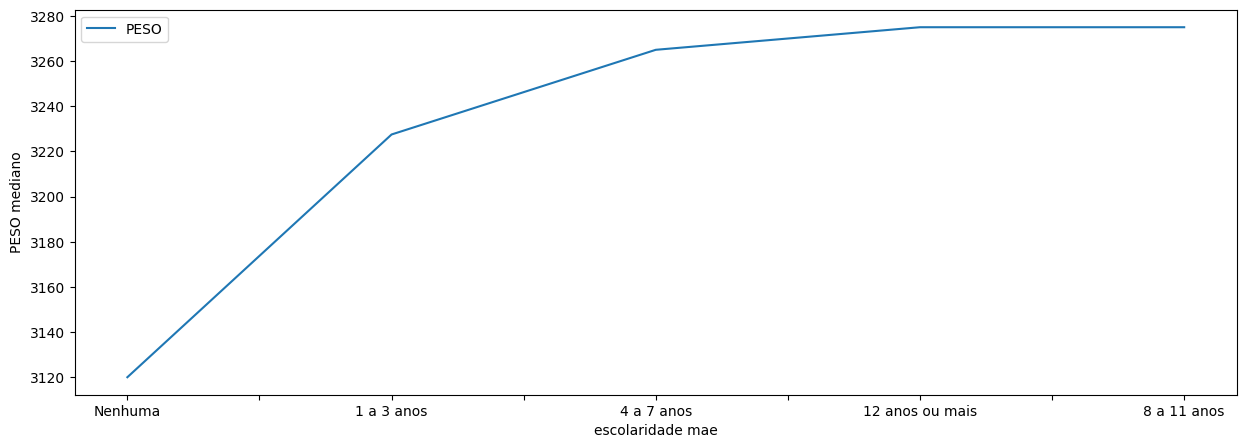

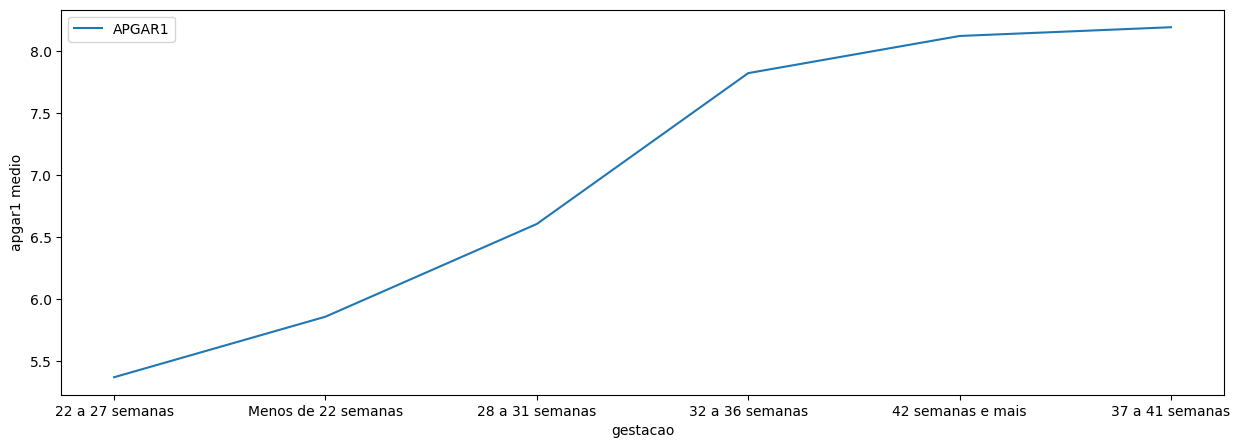

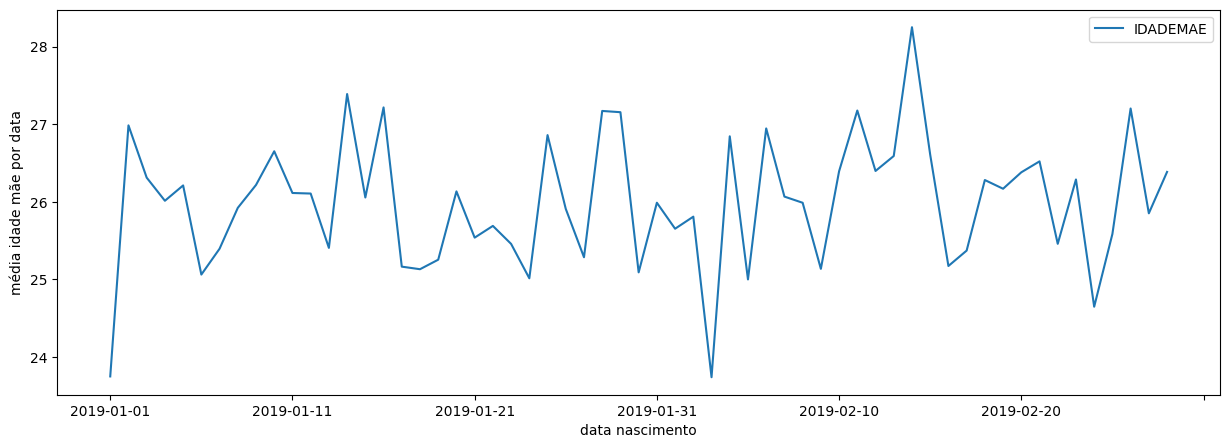

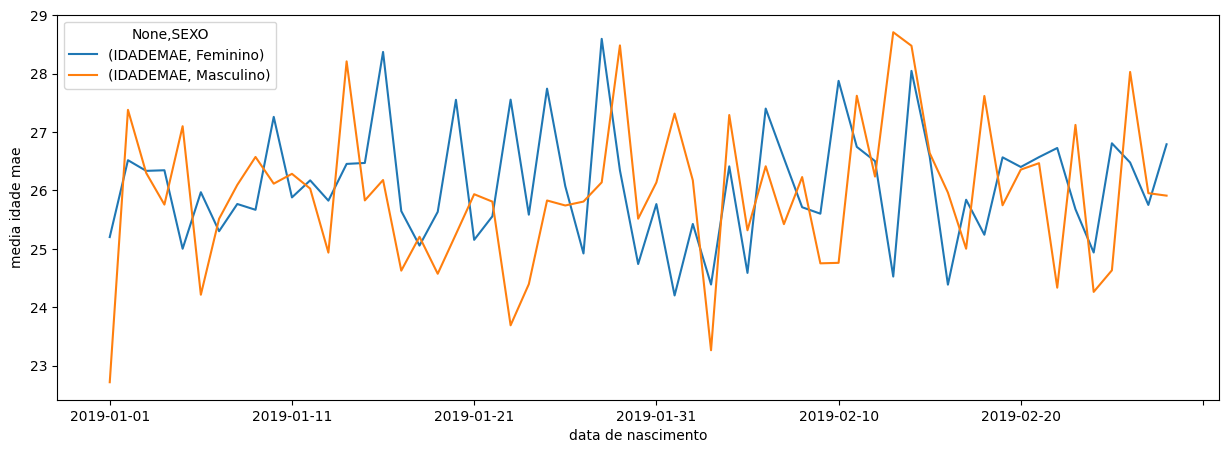

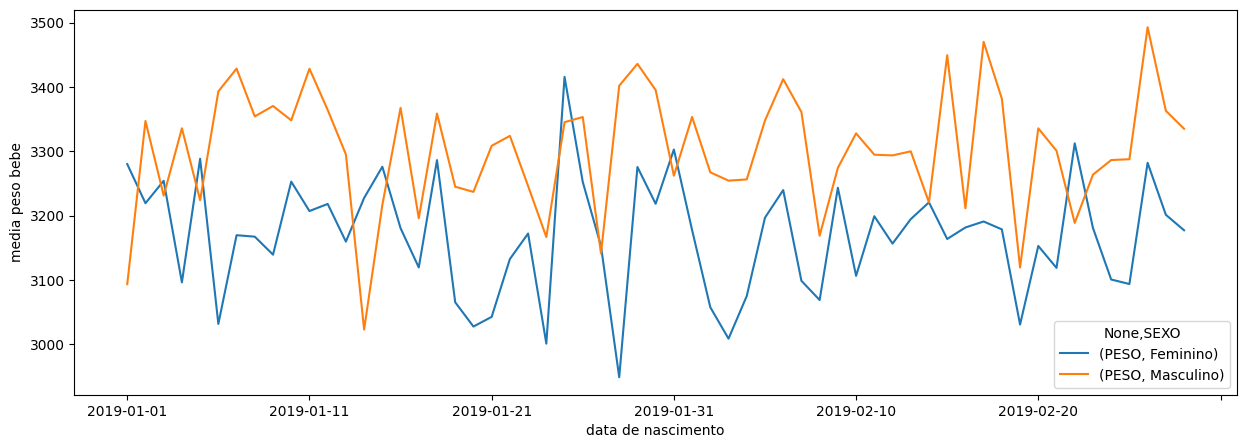

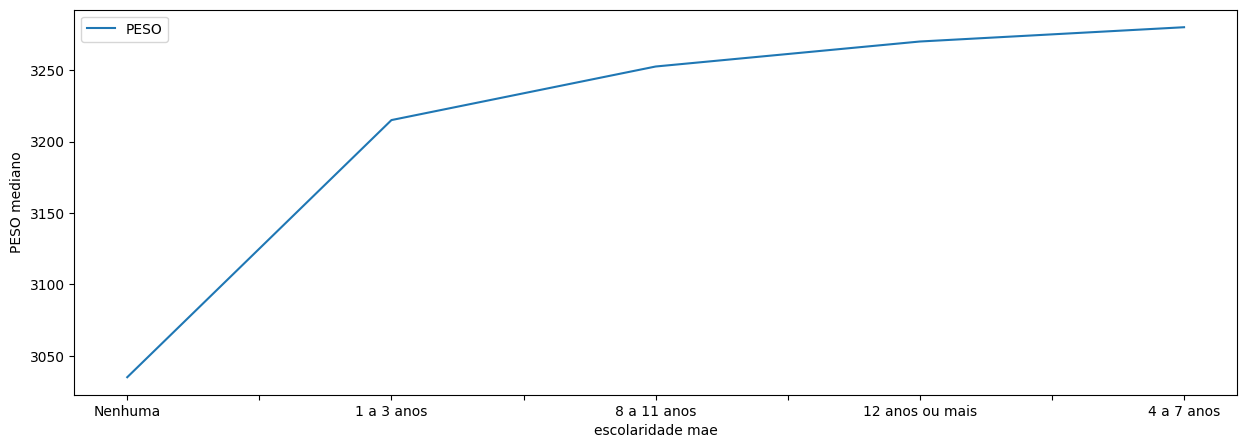

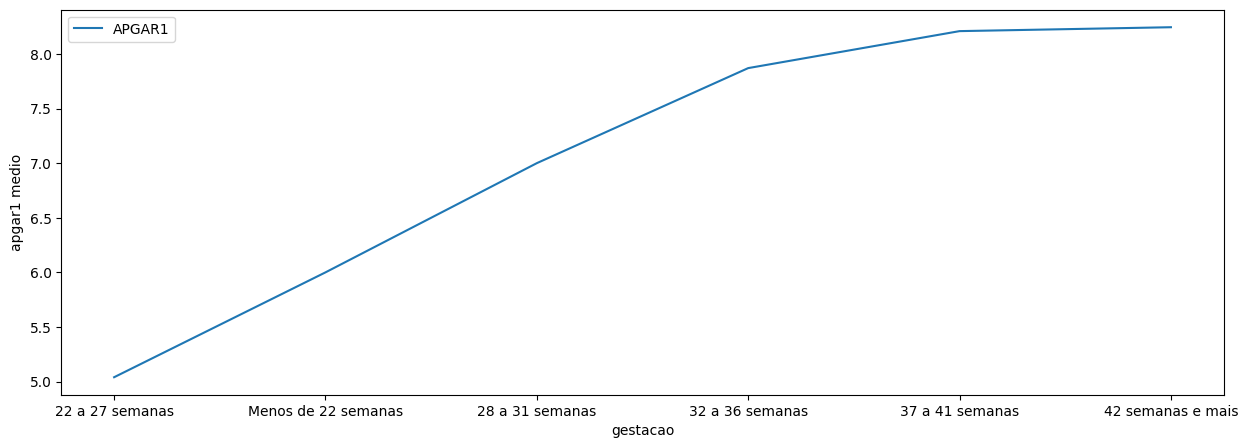

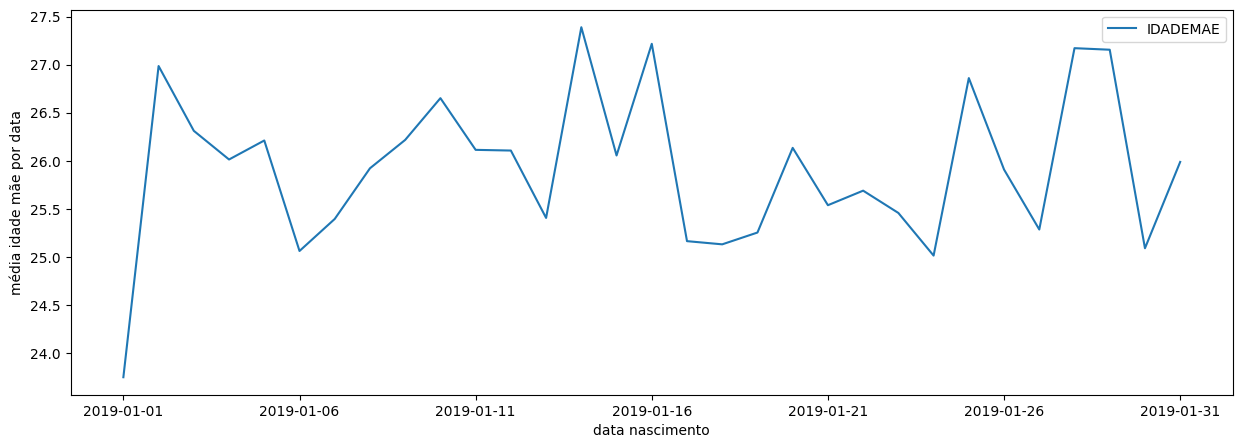

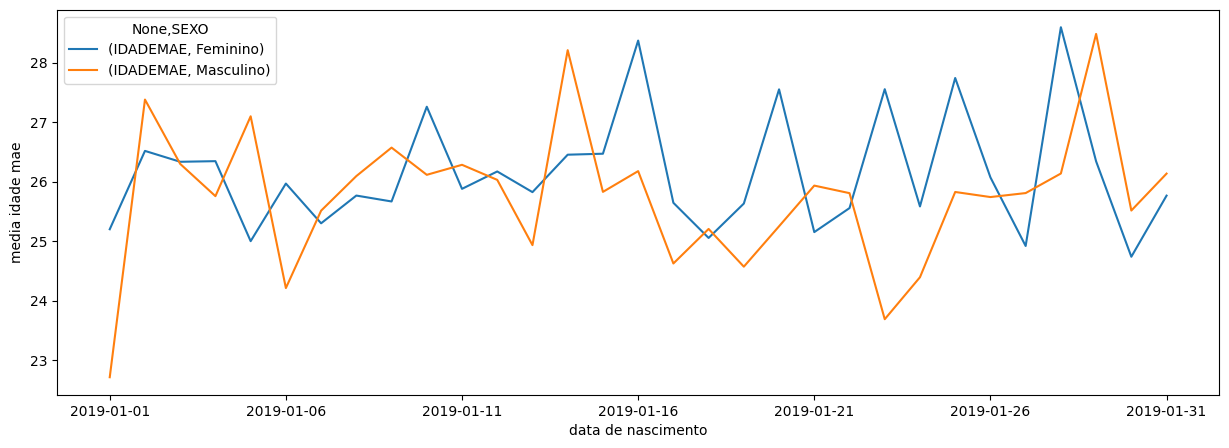

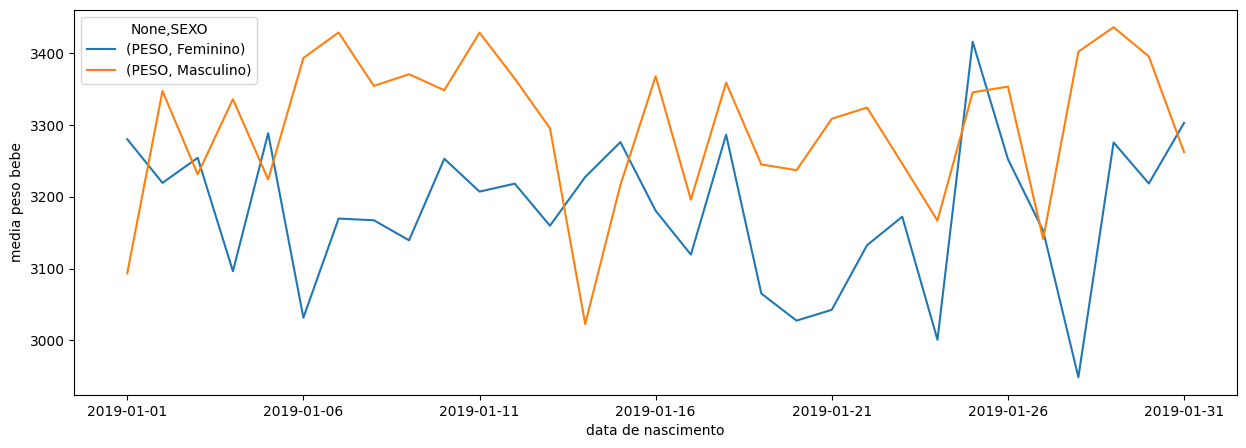

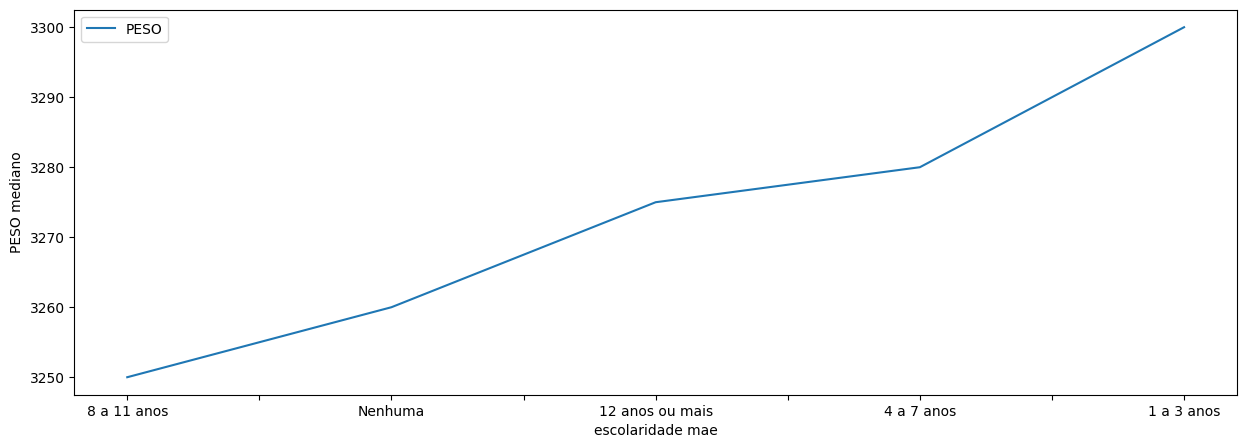

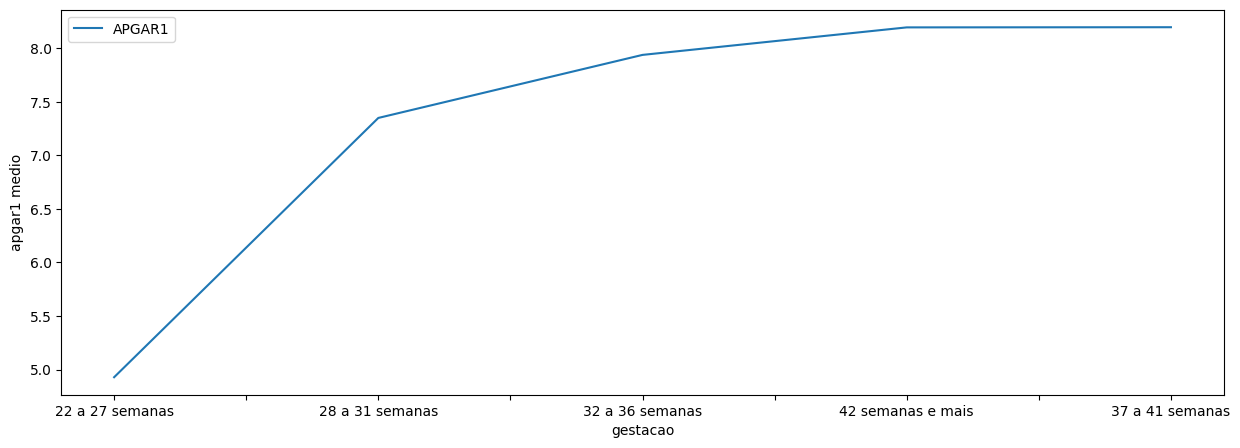

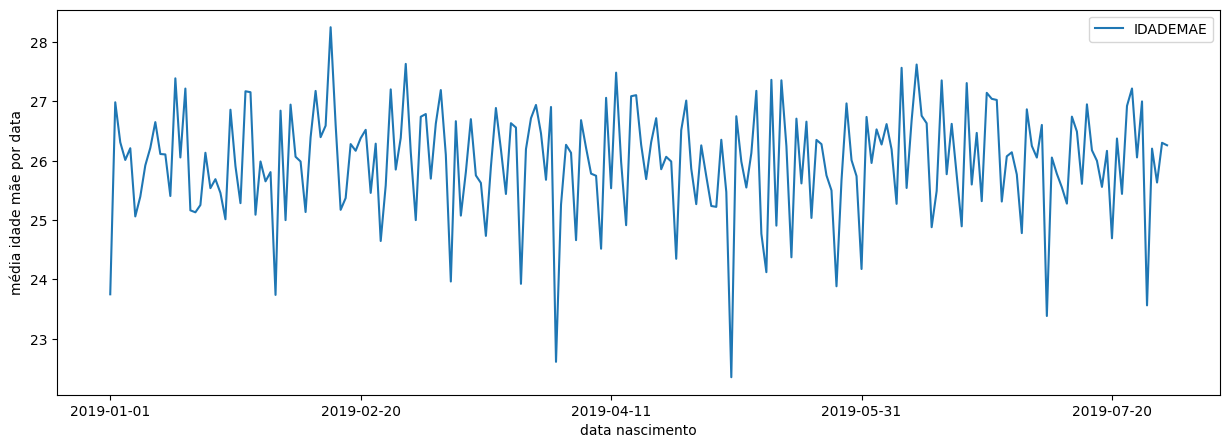

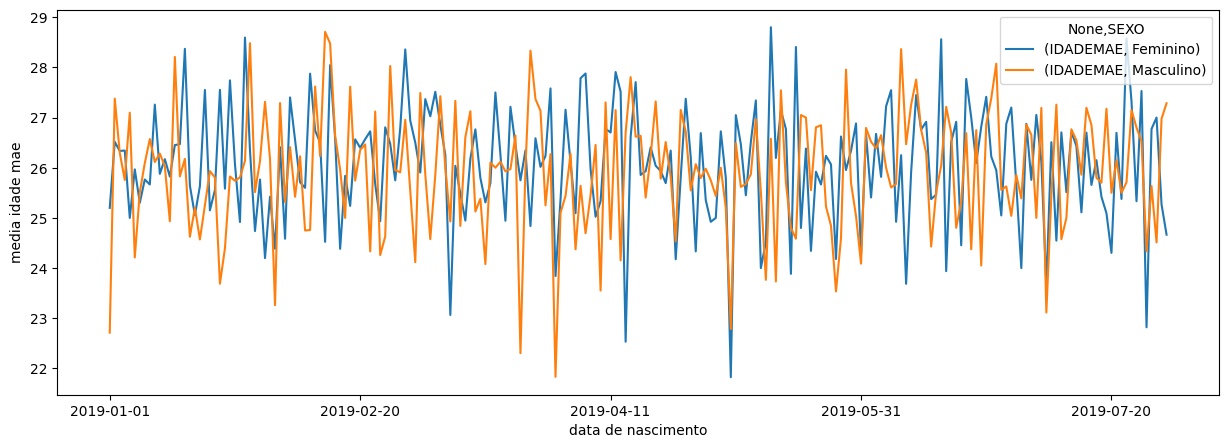

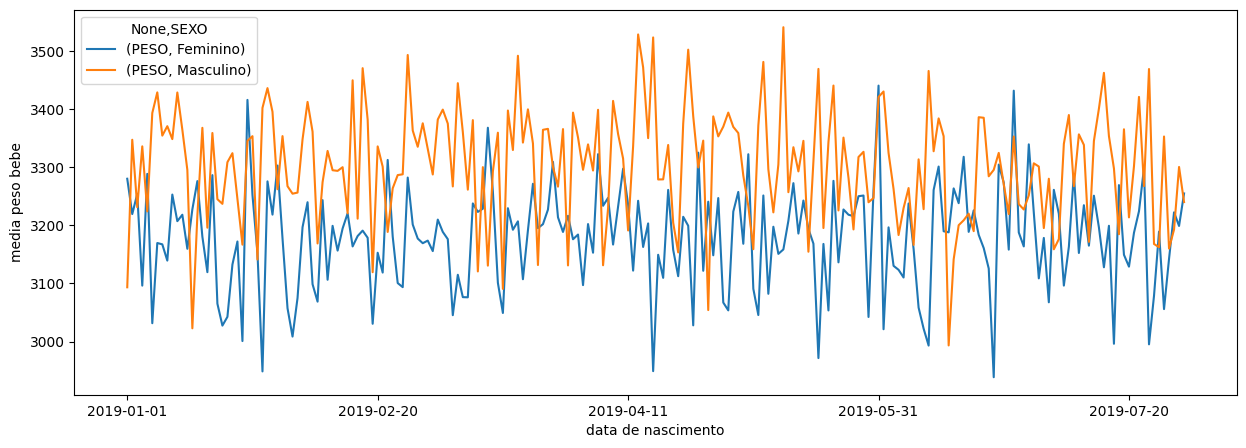

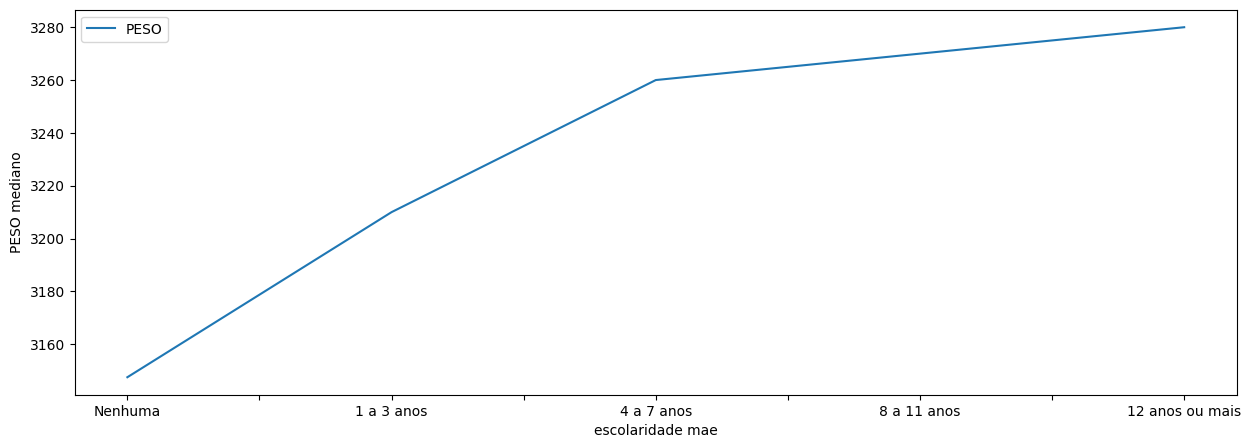

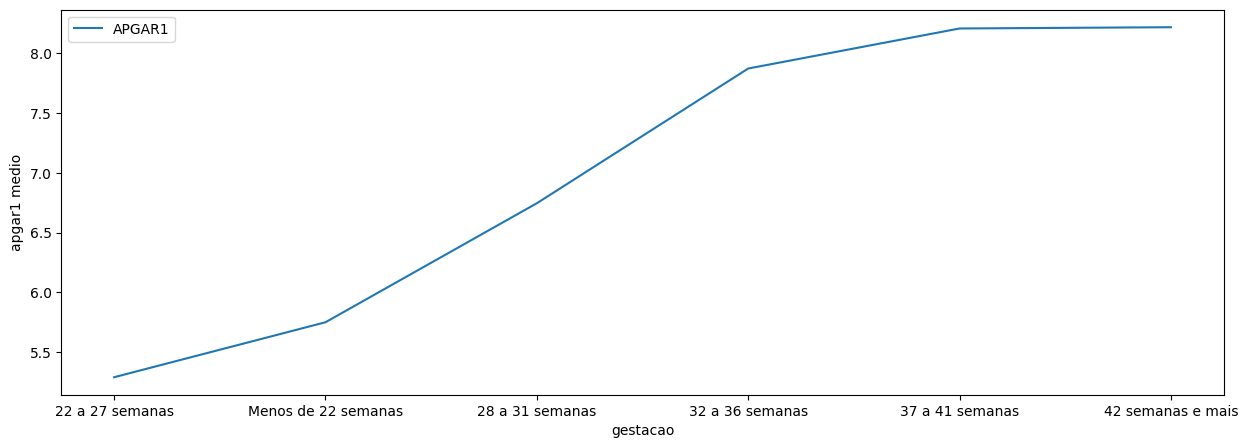

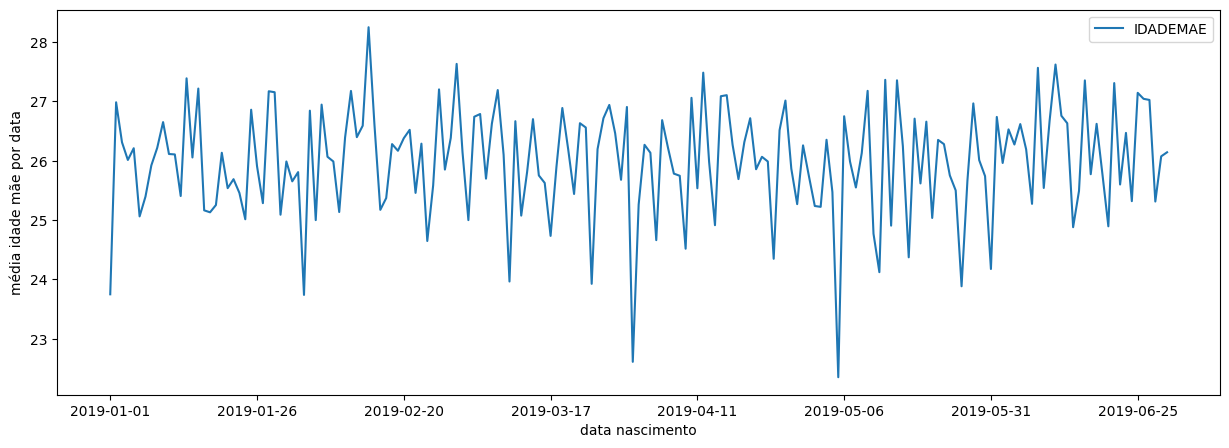

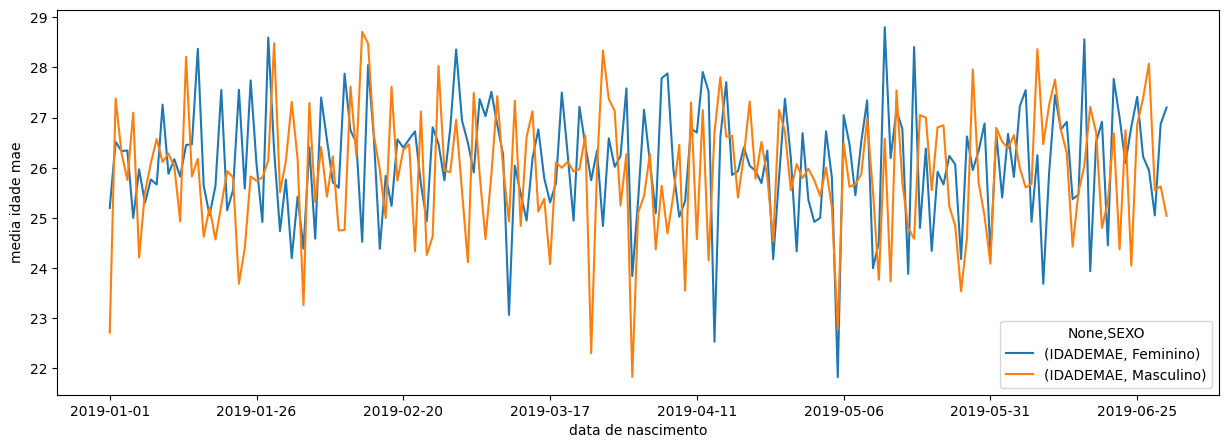

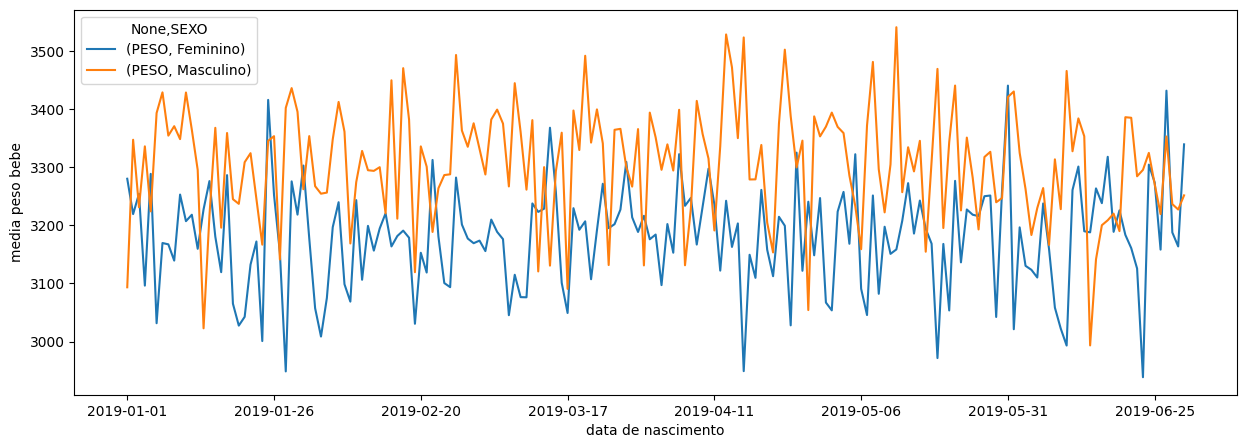

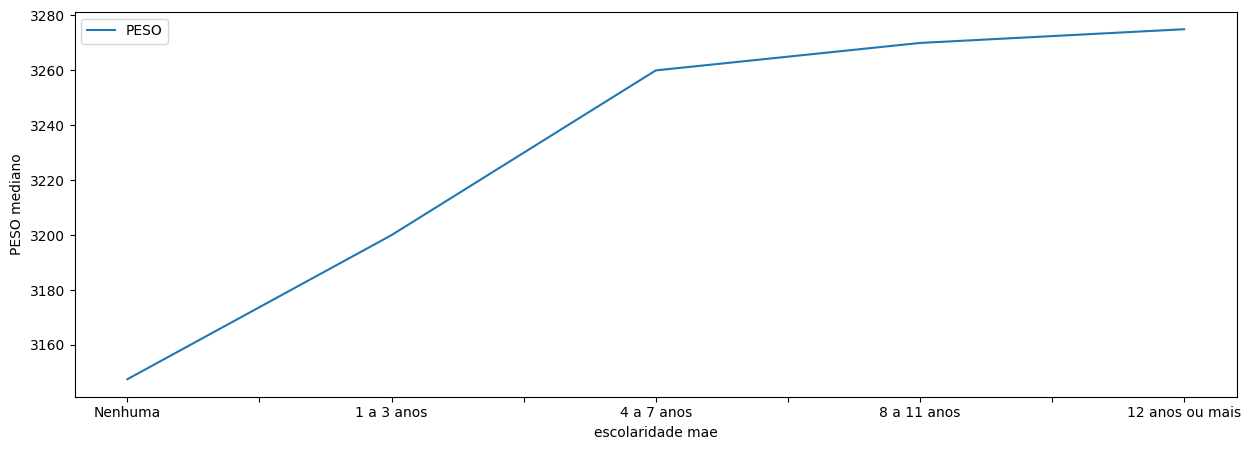

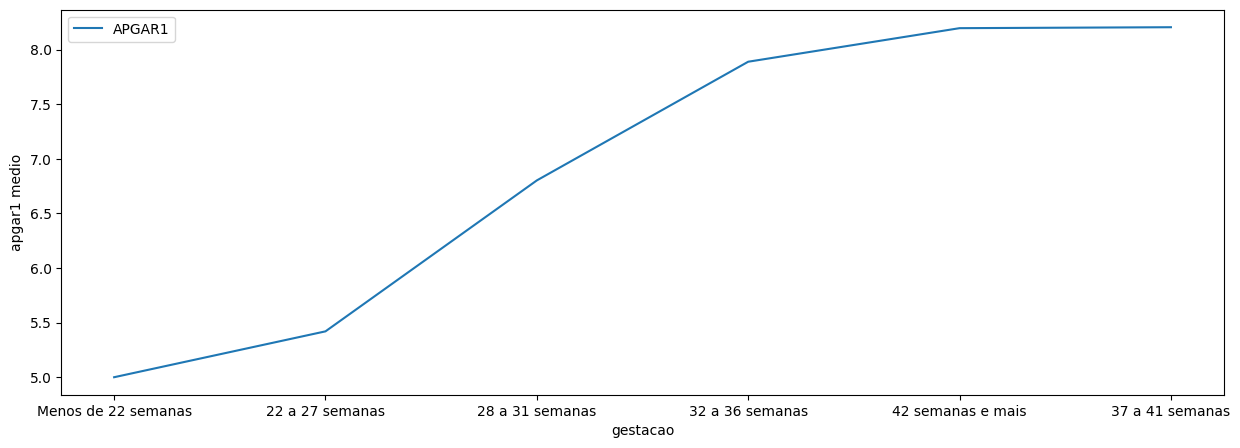

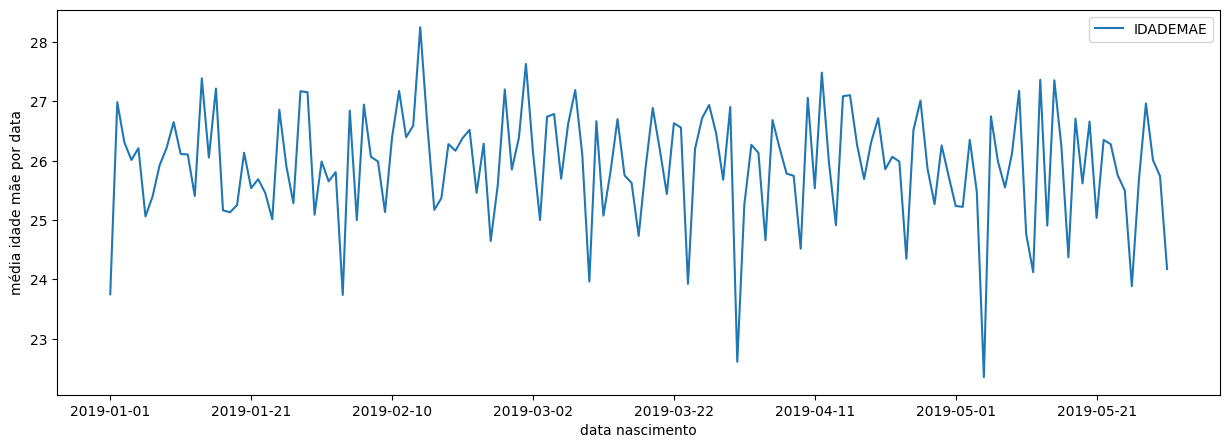

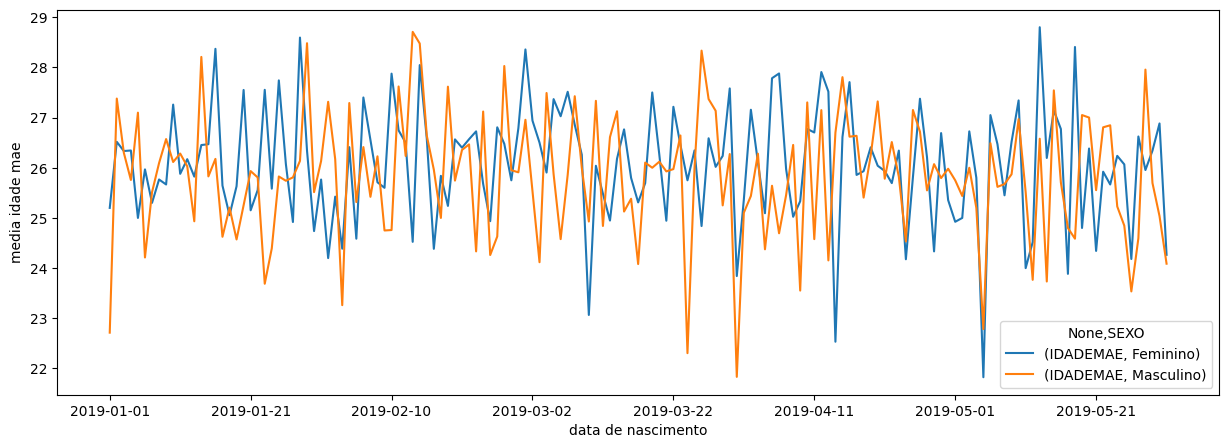

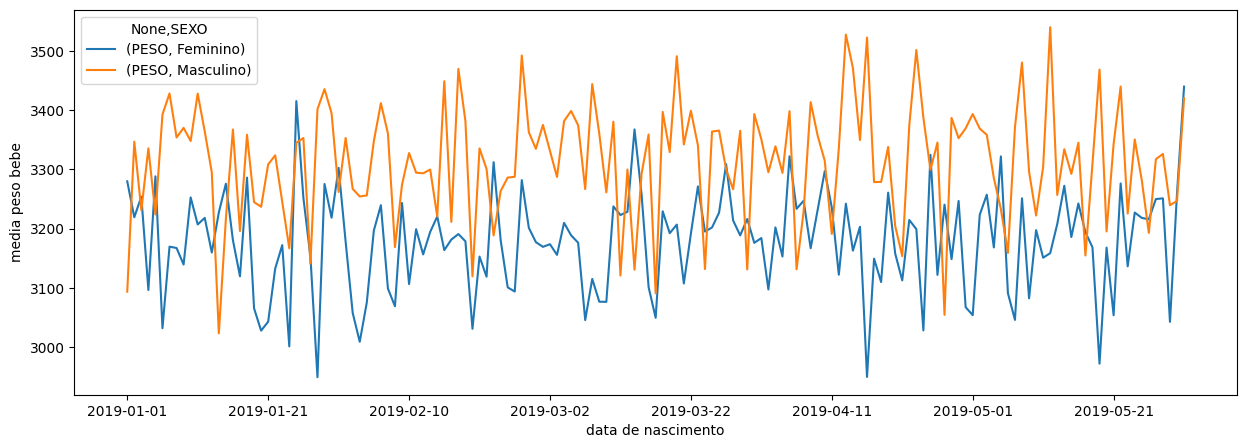

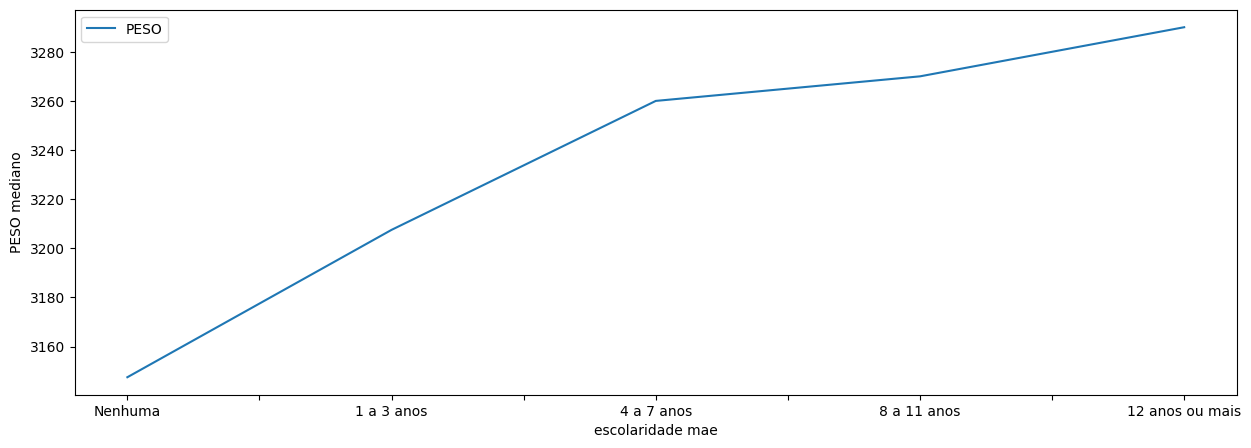

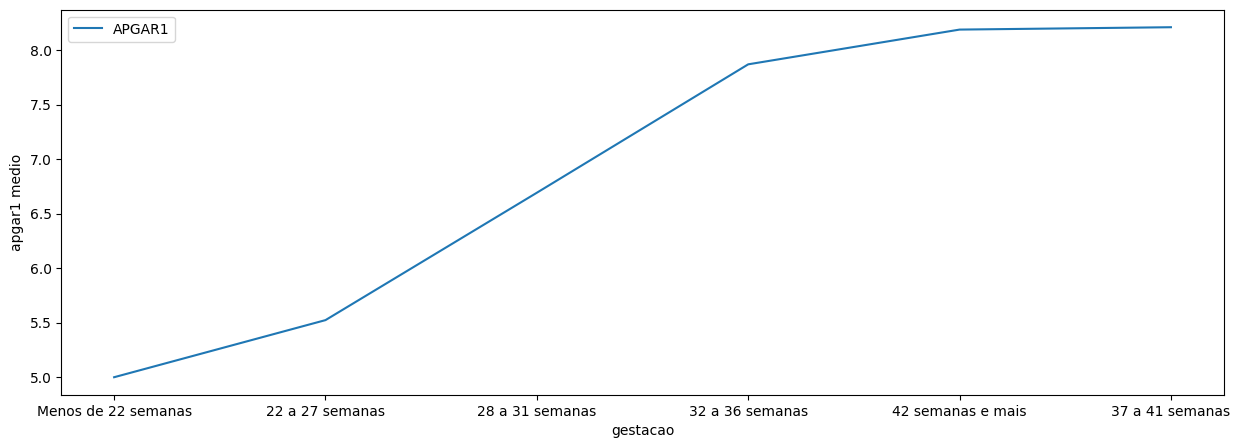

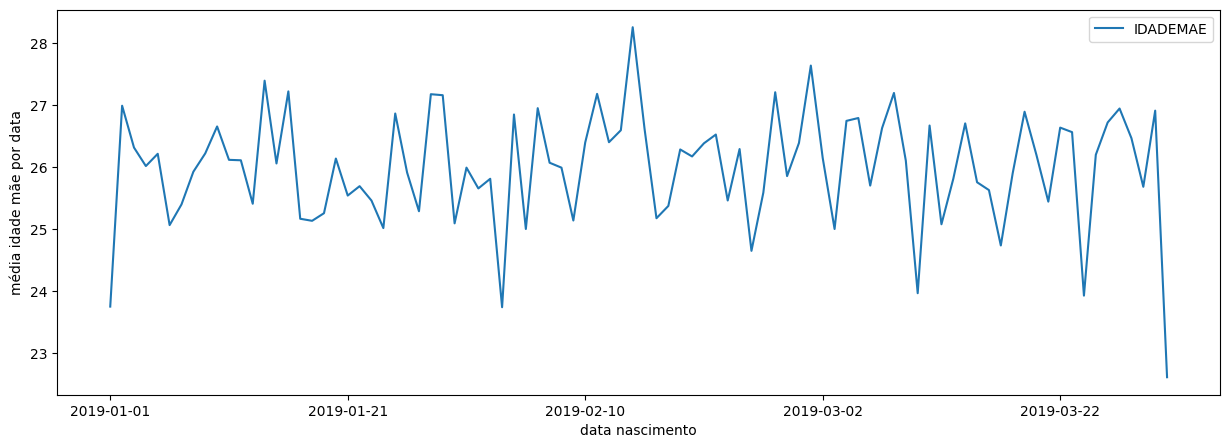

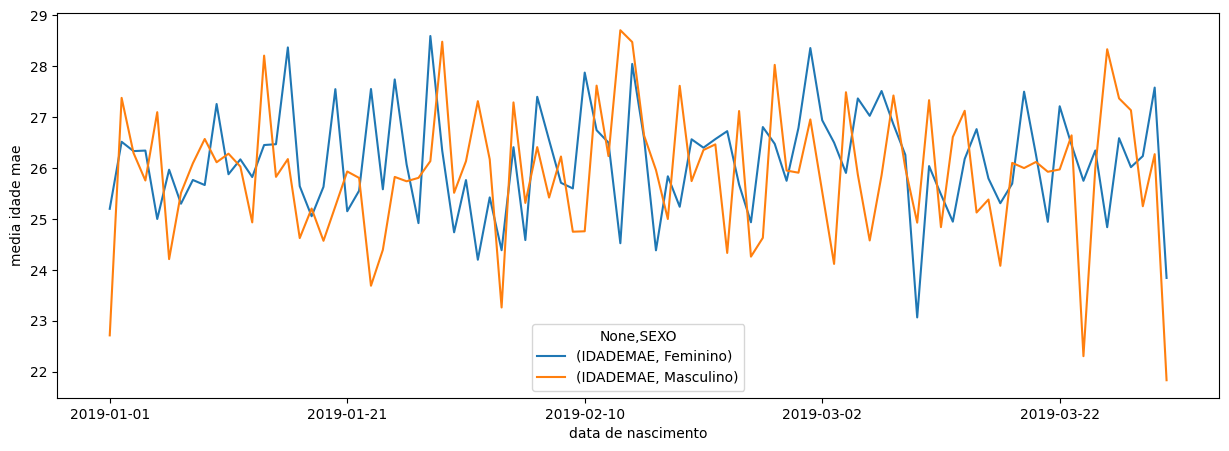

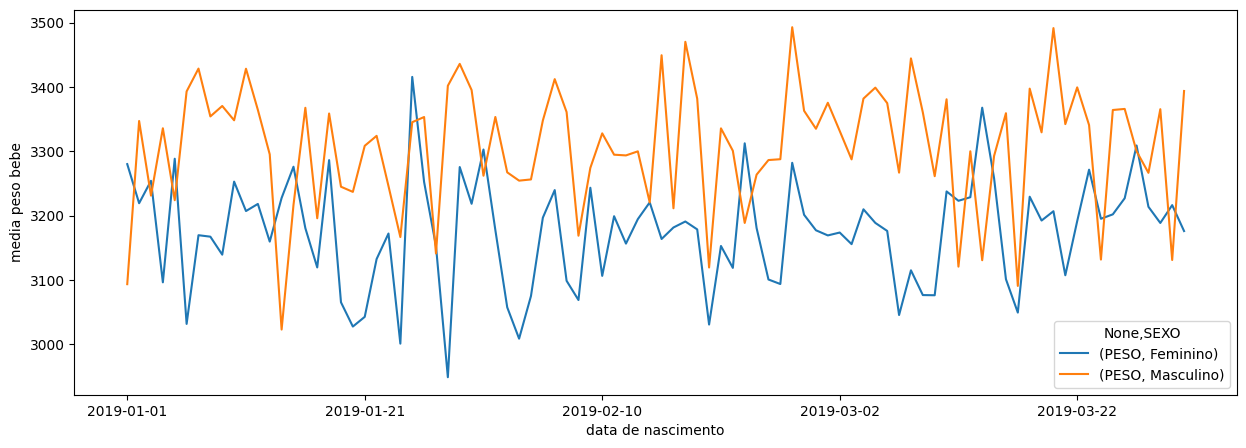

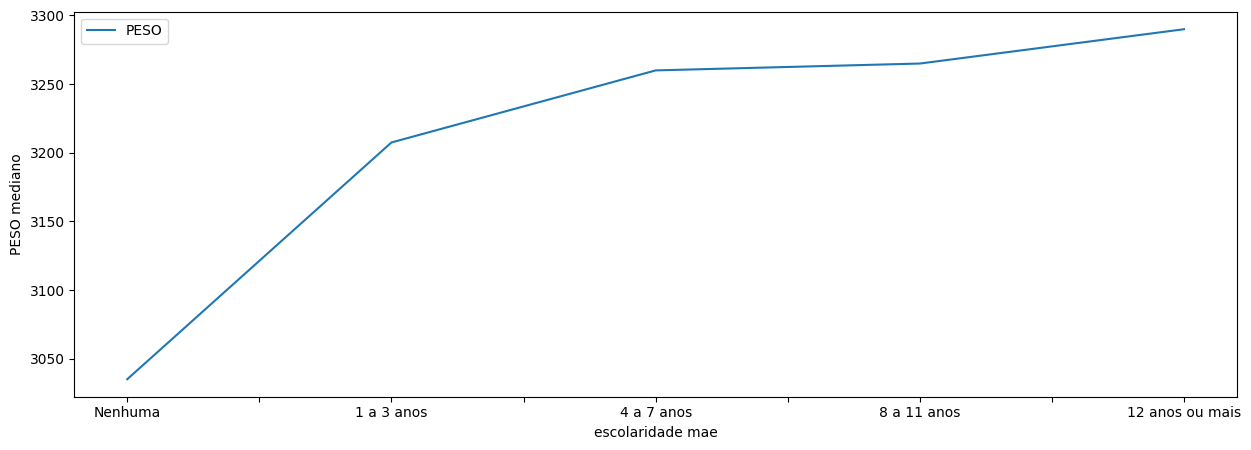

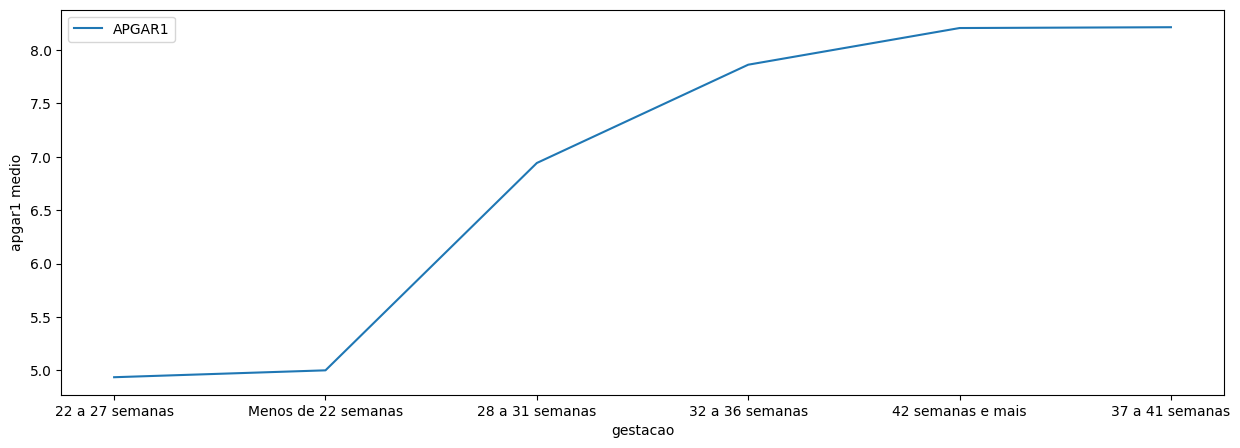

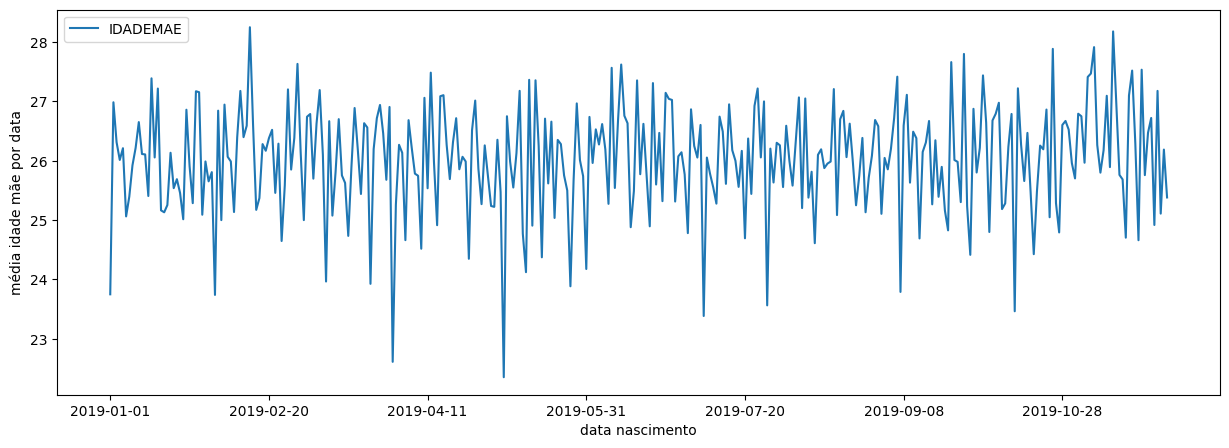

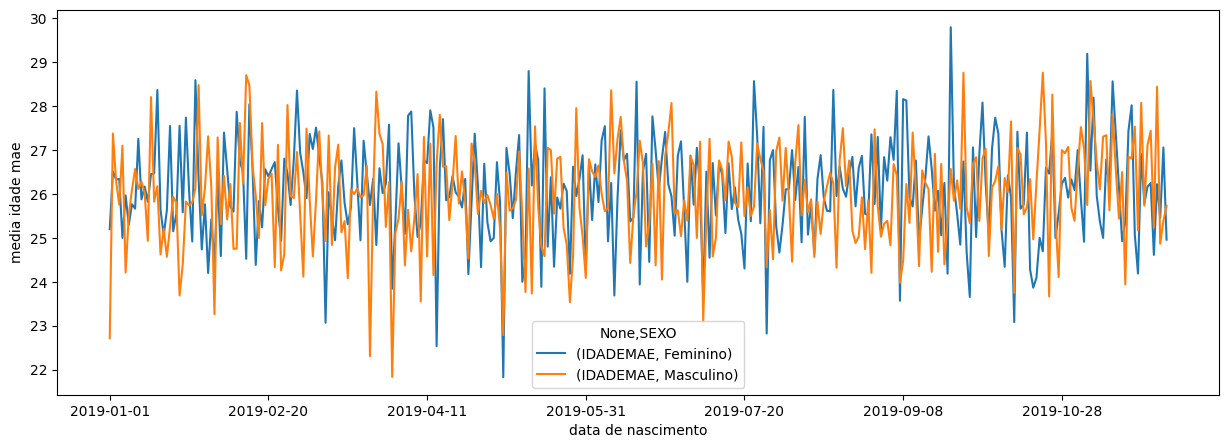

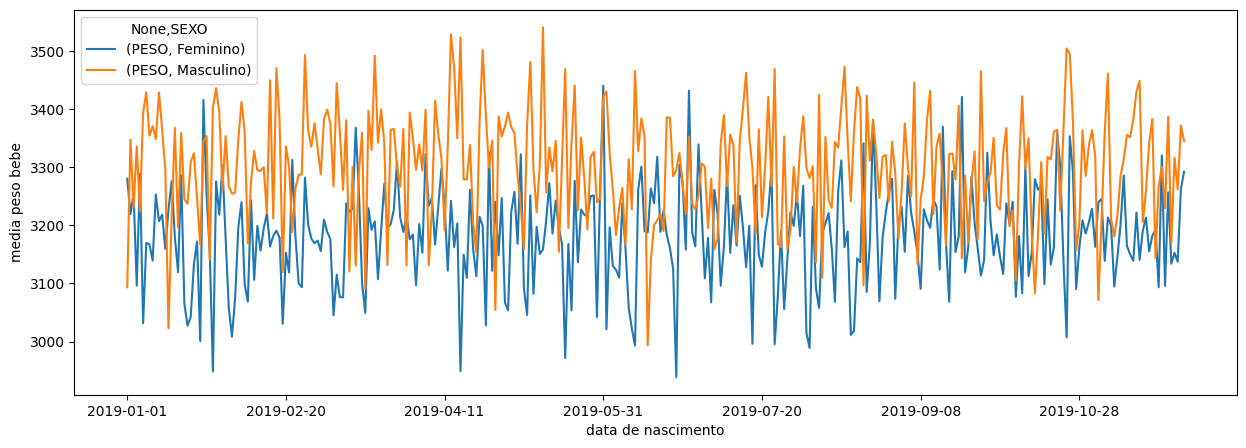

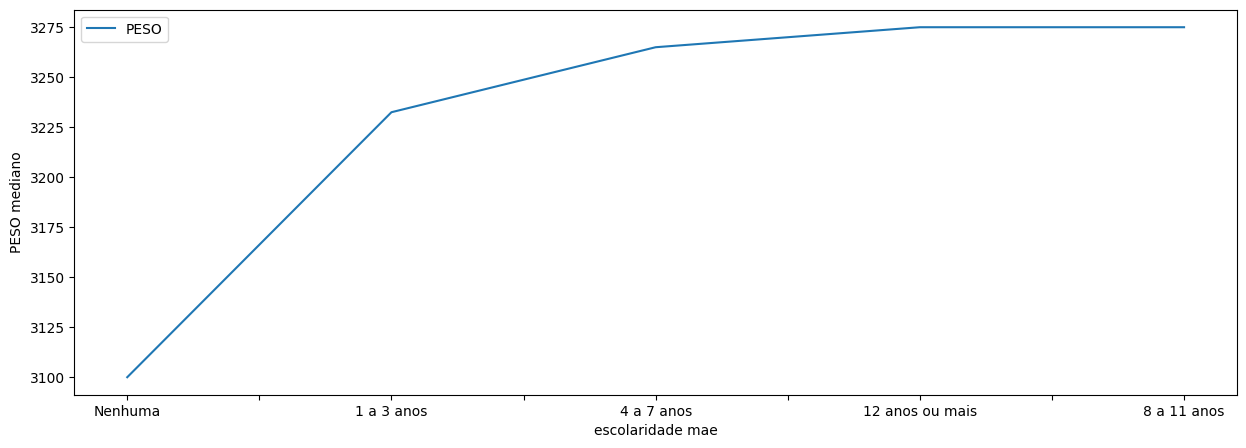

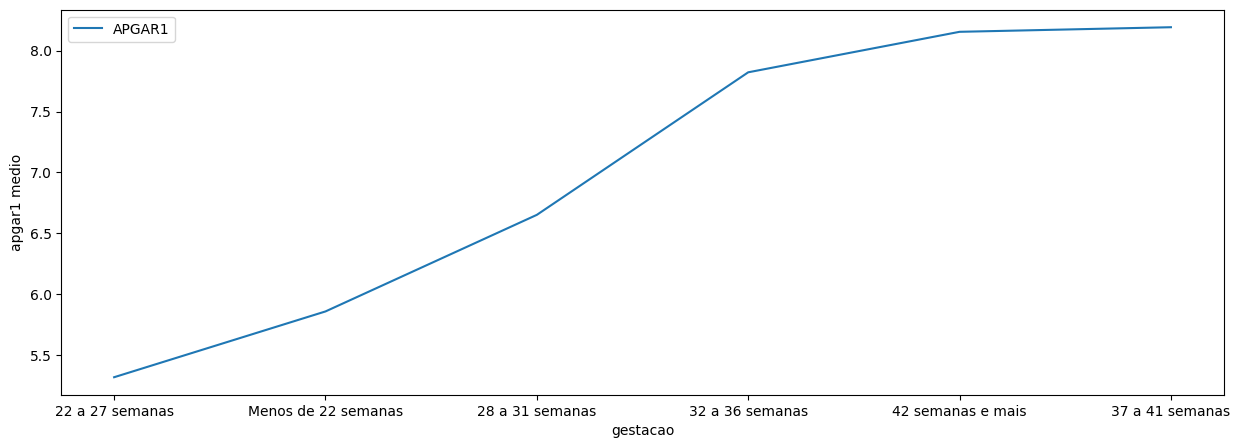

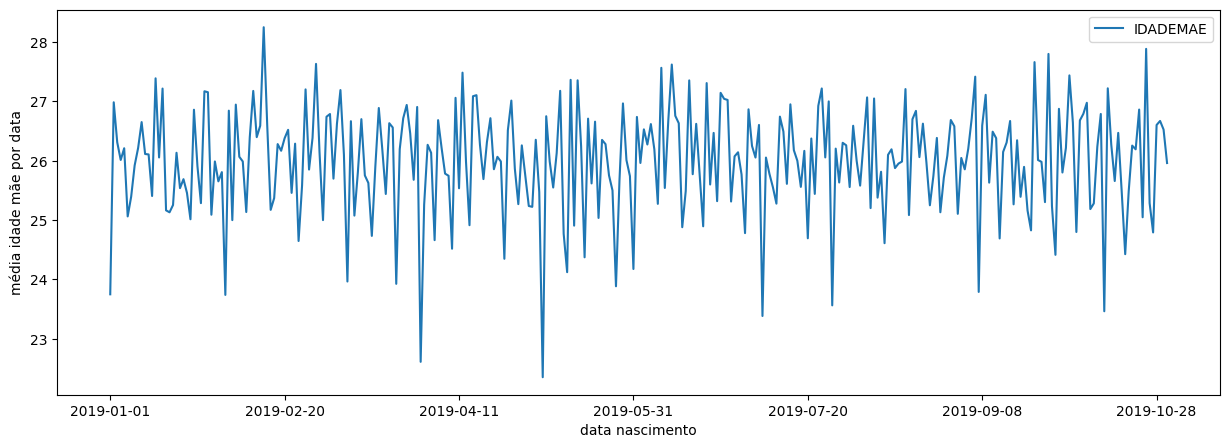

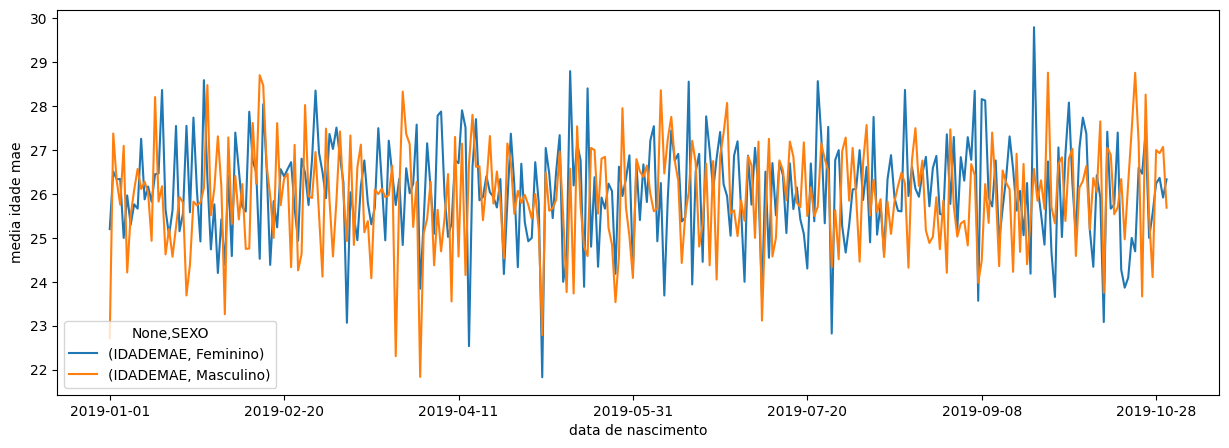

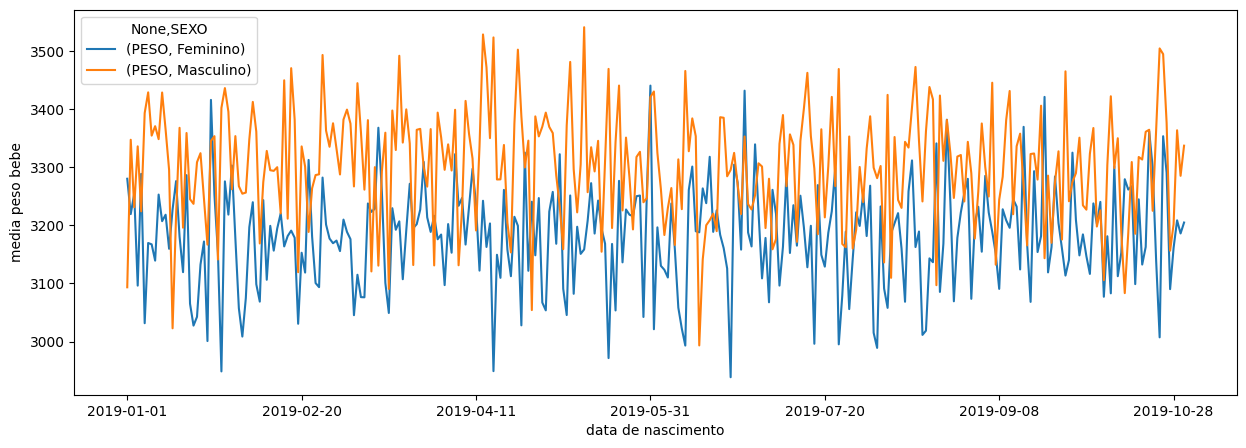

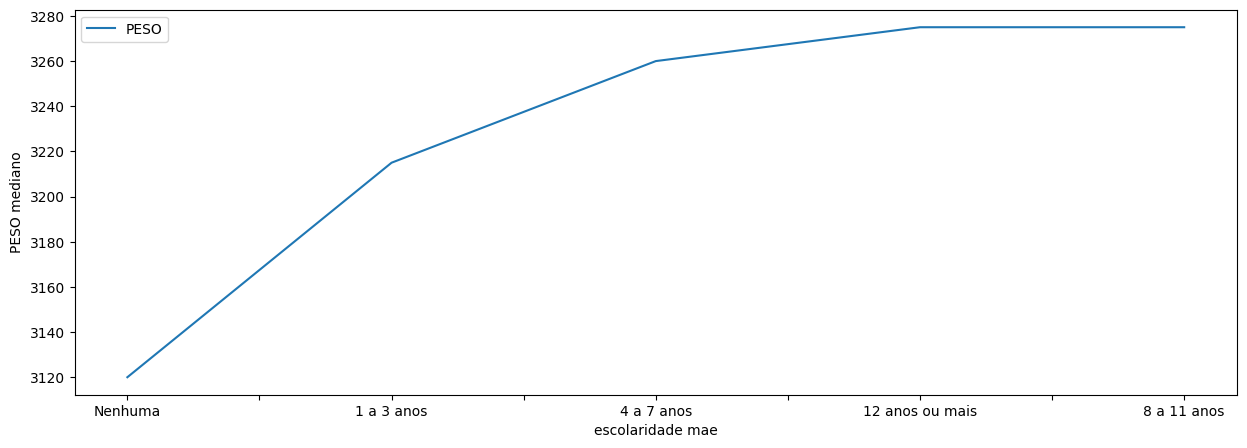

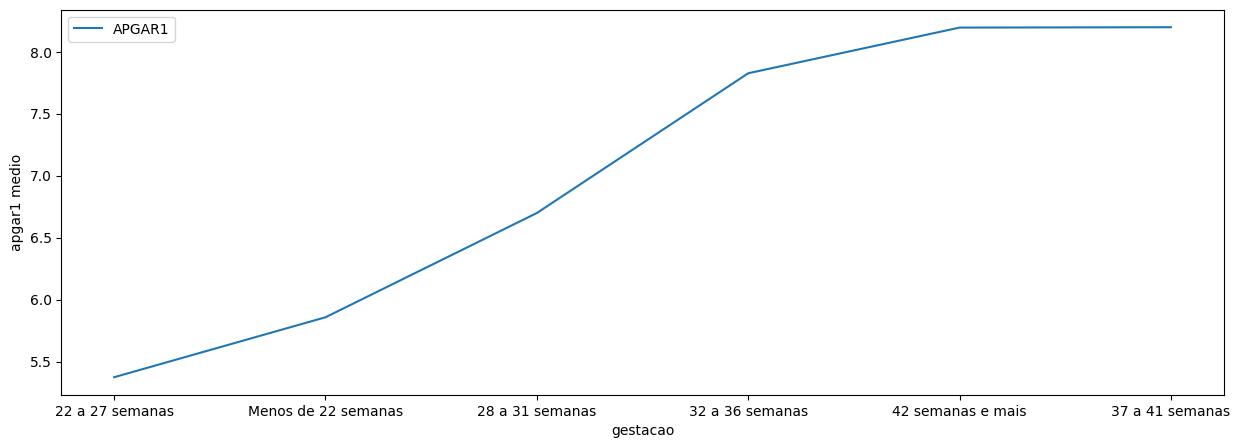

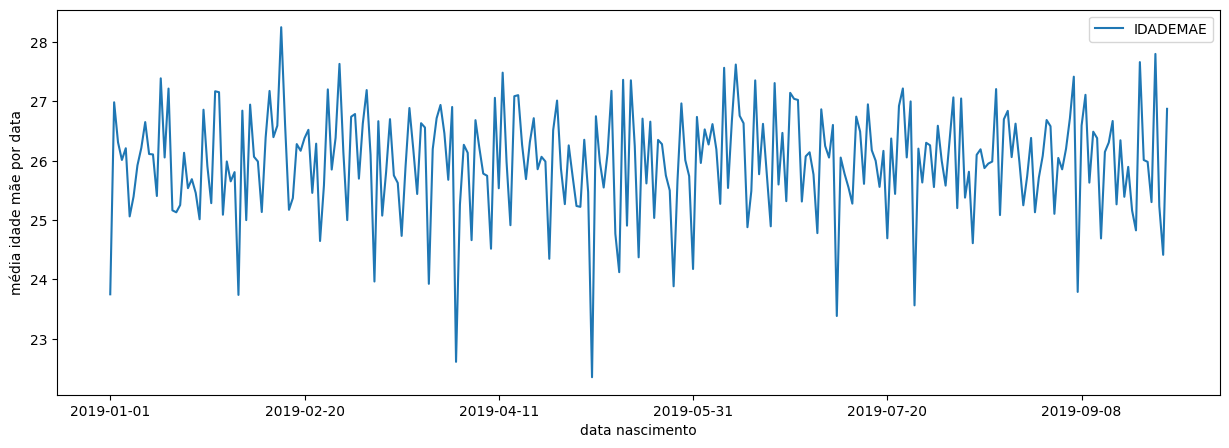

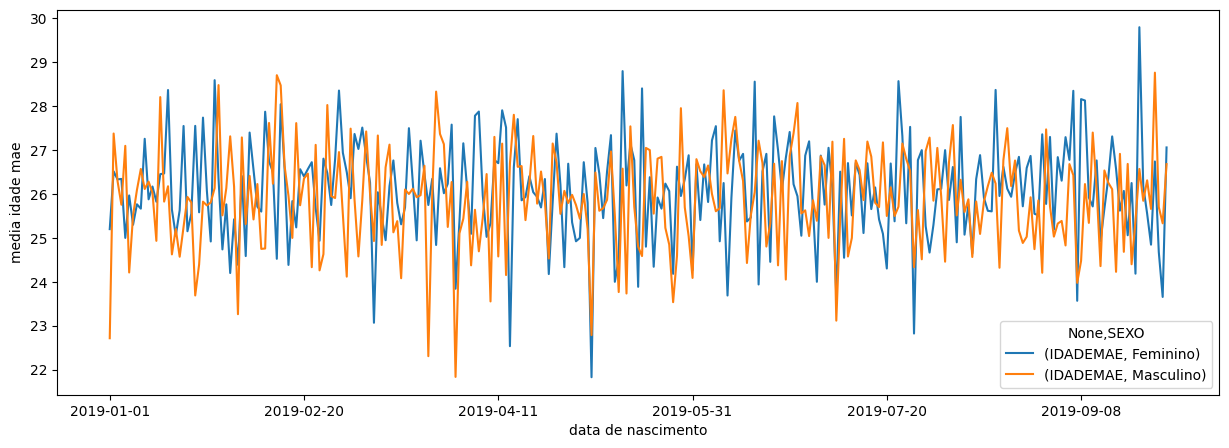

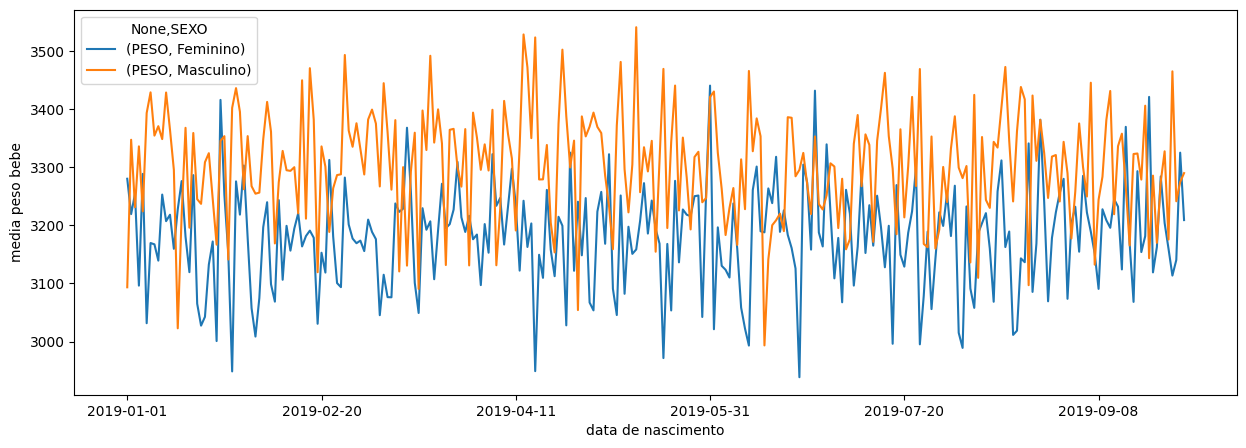

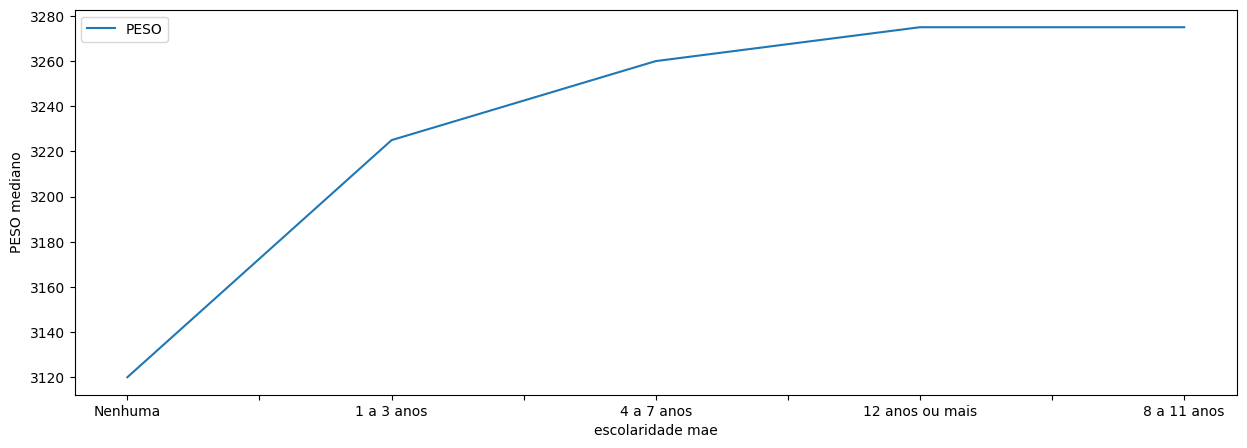

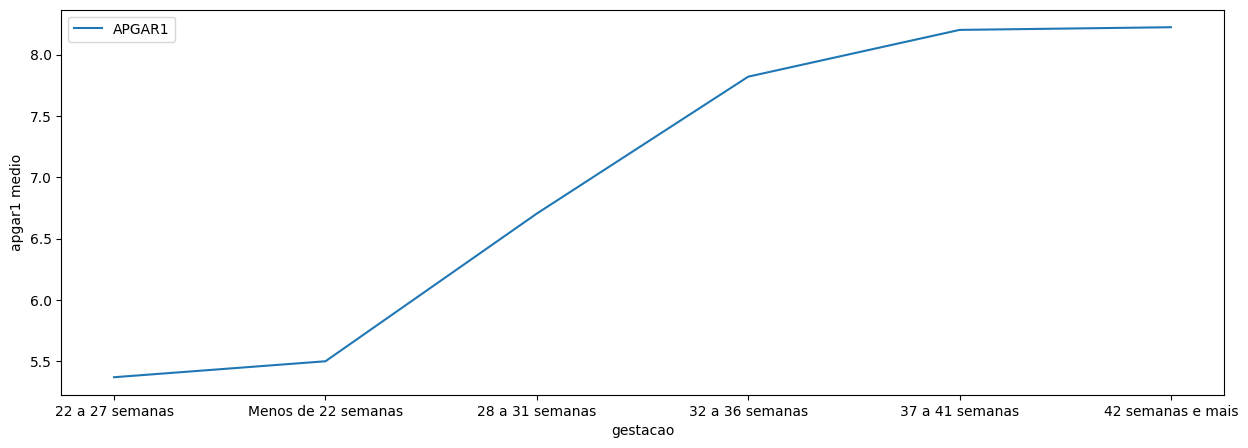

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

''' Aqui é utilizado a função plota_pivot_table que recebe os parâmetros que estão dentro do
"if" no looping criado abaixo e gera seus respectivos gráficos'''
########################################################################################################
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None
########################################################################################################

''' -----------------> Coloque aqui a sua pasta de inputs <----------------- '''
pasta_input = './input/'
''' -----------------> Coloque aqui a sua pasta de outputs <----------------- '''
pasta_output = './input/Graficos/'

''' Salvando o nome dos arquivos da pasta input na variável arquivos'''
arquivos = os.listdir(pasta_input)
''' Salvando o nome dos arquivos da pasta input na variável arquivos'''
graficos = os.listdir(pasta_output)
''' Ambas as variáveis acima vão ser usadas para fazer comparações entre elas'''

''' Usando uma compreensão de lista para filtrar apenas os arquivos CSV, o primeiro "arquivo" é
apenas uma declaração da variável, depois é um for comum que percorre cada item dentro de arquivos
e é feito um if para filtrar os arquivos com final .csv, salvando em arquivos_csv'''
arquivos_csv = [arquivo for arquivo in arquivos if arquivo.endswith('.csv')]

''' Feito filtro para pegar apenas os arquivos com final mês _=resto do nome, 
[A-Z]{3}=apenas letras e no máximo 3 delas, $=fim da string, já que o nome do mês
está sempre no final, o uso da contra-barra "\" é para que o "." seja encarado como string'''
padrao_mes = r'_([A-Z]{3})\.csv$'

''' Novamente um novo filtro, igual ao anteior, mas agora será passado o padrao_mes para filtrar
e finalmente temos nossa lista de arquivos limpa dos demais, necessário manter o padrão dos nomes
para não dar problema'''
arquivos_csv = [arquivo for arquivo in arquivos_csv if re.search(padrao_mes, arquivo)]

''' Dicionário para relacionar os meses com seus números'''
meses_numeros = {
    'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04', 'MAI': '05', 'JUN': '06',
    'JUL': '07', 'AGO': '08', 'SET': '09', 'OUT': '10', 'NOV': '11', 'DEZ': '12'
}


for arquivo in arquivos_csv: # percorrendo todos arquivos da lista montada anteriormente
    partes = arquivo.split('_') # dividindo o nome da primeira posição da lista por "_"
    ano = partes[2] # pegando a terceira posição da nova lista "partes" que é o ano
    mes = partes[3].split('.')[0] # pegando a terceira posição que é MES.png separando o "." e fica o MES
    nome_pasta = f"{ano}-{meses_numeros[mes]}" # salvando nome, usado o dicionário acima para o MES
    
    if nome_pasta not in graficos: # filtro para não salvar atoa
        os.makedirs('./input/Graficos/'+nome_pasta, exist_ok=True) # criando a pasta e removando msg de erro caso a pasta já exista
        sinasc = pd.read_csv(f'./input/{arquivo}') # lendo um novo csv
    
        # Parametros padrão que está sendo usada na função plota_pivot_table
        plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
        plt.savefig('./input/Graficos/'+nome_pasta+'/media idade mae por data.png')

        plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
        plt.savefig('./input/Graficos/'+nome_pasta+'/media idade mae por sexo.png')

        plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
        plt.savefig('./input/Graficos/'+nome_pasta+'/media peso bebe por sexo.png')

        plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
        plt.savefig('./input/Graficos/'+nome_pasta+'/PESO mediano por escolaridade mae.png')

        plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
        plt.savefig('./input/Graficos/'+nome_pasta+'/media apgar1 por gestacao.png')
    else:
        print(f"O arquivo {nome_pasta} já existe!")
    
    